# Bike Sharing Assignment

# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [225]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [226]:
bike=pd.read_csv('Day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [227]:
# Dropping instant, dteday as the informaion is available in other columns. Dropping casual and registered as 
# cnt=casual+registered. Casual and Registered also seem to be derived variables and will not be used in the modelling purpose
bike.drop(['instant','dteday','registered','casual'],axis=1,inplace=True)

In [228]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [229]:
# Mapping the categorical columns inorder to remove ordinality as per the description of the columns
bike["season"]=bike["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike["weekday"]=bike["weekday"].map({0:'Sunday',1:"Monday",2:"Tuesday",3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike["mnth"]=bike["mnth"].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike["weathersit"]=bike["weathersit"].map({1:'Clear',2:'Cloudy',3:'Light Rain, Snow',4:"Heavy Rain, Snow"})

In [230]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


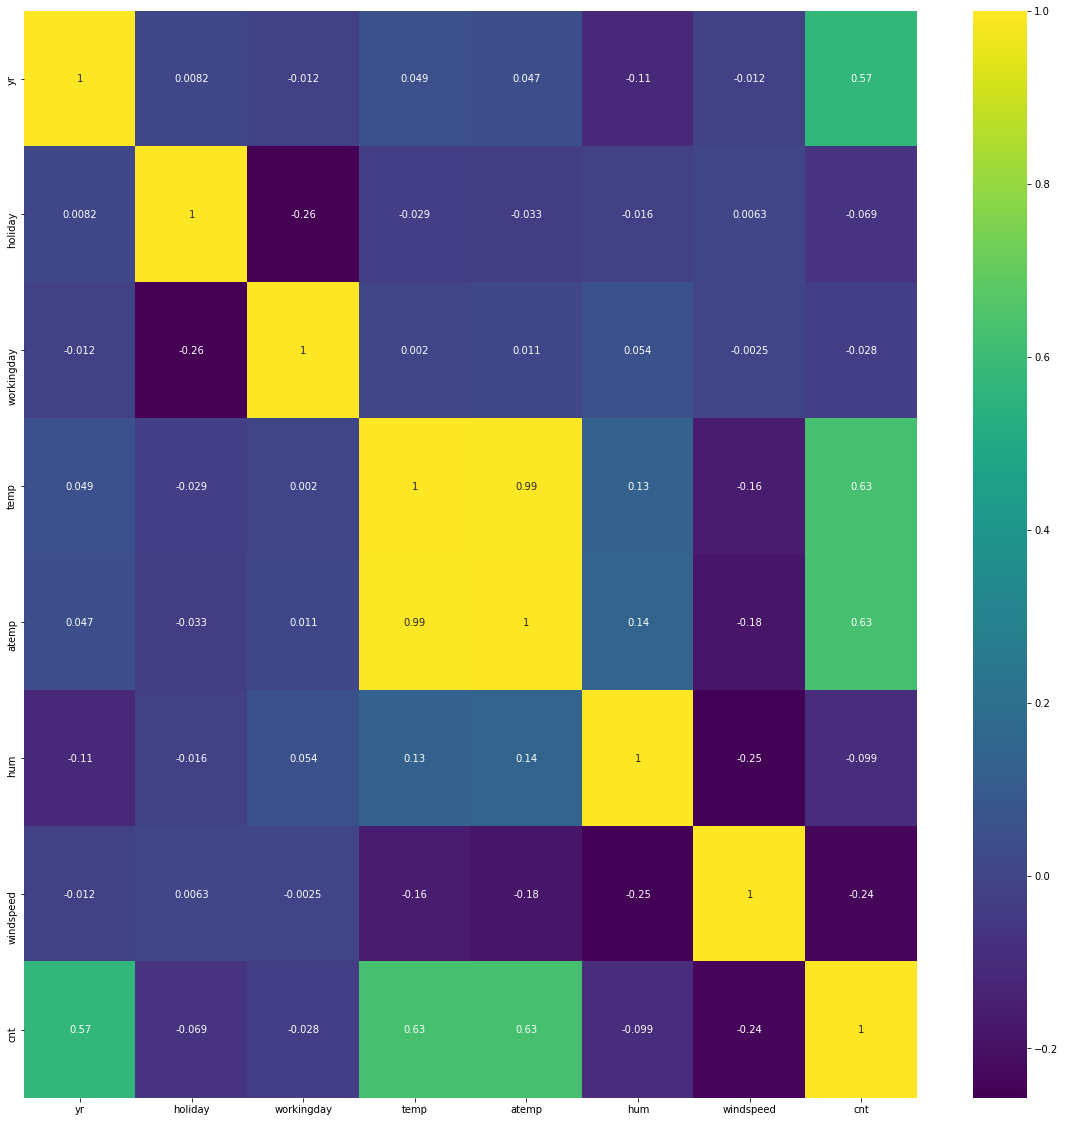

In [231]:
# Checking the correlation after dropping the variables
plt.figure(figsize=(20,20))
sns.heatmap(bike.corr(),cmap='viridis',annot=True)
plt.show()

- We see that temp and atemp are highly correlated, either can be dropped. However, not dropping either since in the process of RFE/Variance_inflation_factor one would be removed

# Bivariate Analysis

## Categorical Variables against Count

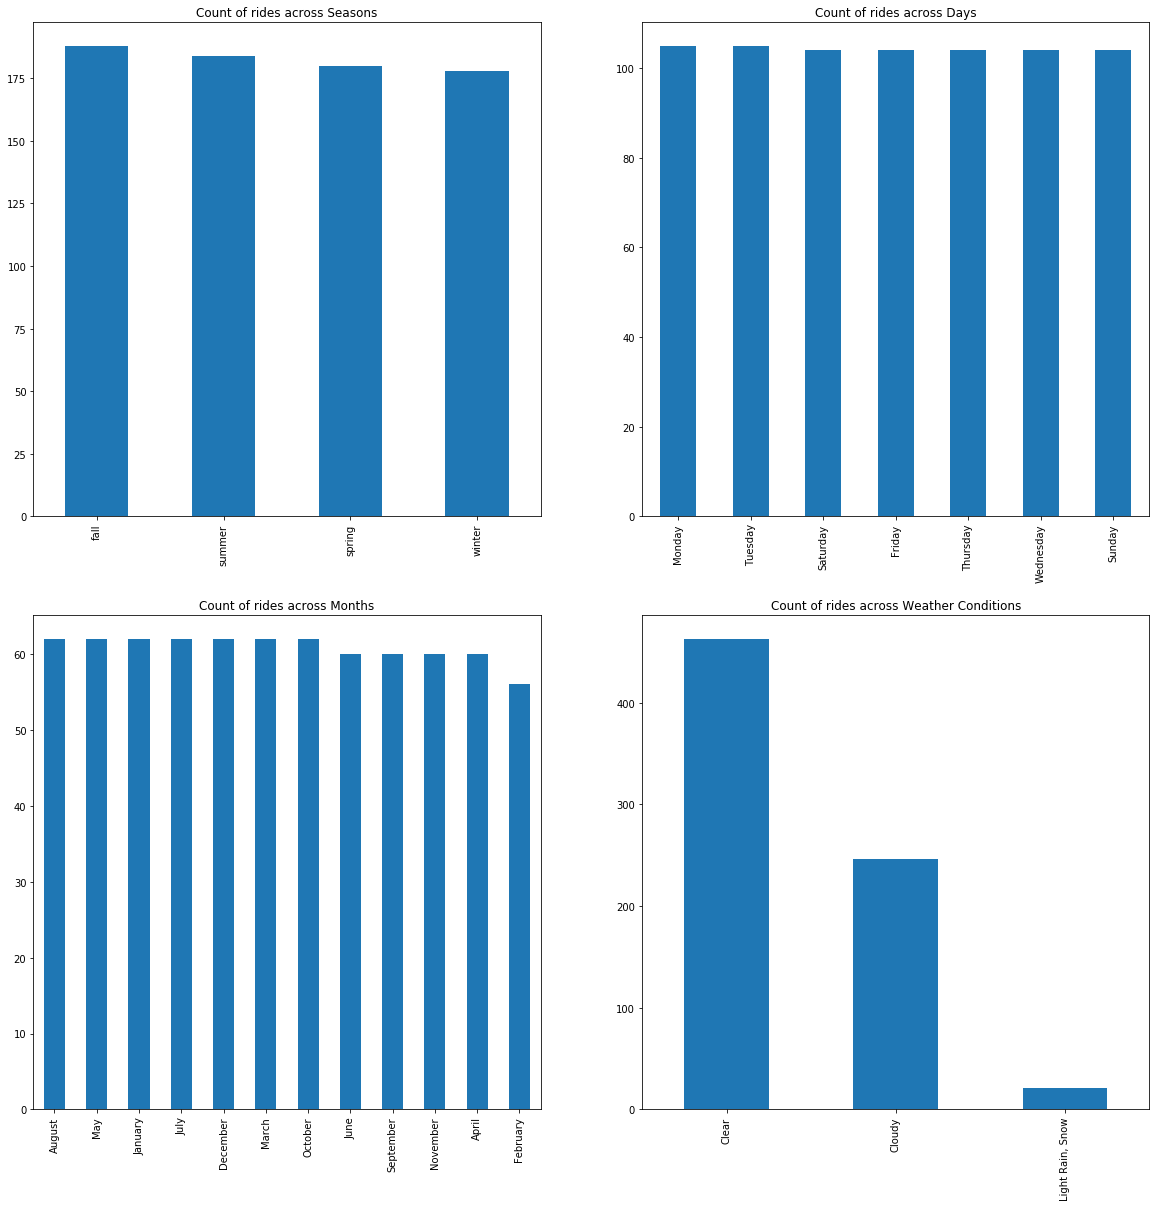

In [232]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
bike.season.value_counts().plot.bar()
plt.title("Count of rides across Seasons")

plt.subplot(2,2,2)
bike.weekday.value_counts().plot.bar()
plt.title("Count of rides across Days")

plt.subplot(2,2,3)
bike.mnth.value_counts().plot.bar()
plt.title("Count of rides across Months")

plt.subplot(2,2,4)
bike.weathersit.value_counts().plot.bar()
plt.title("Count of rides across Weather Conditions")

plt.show()


* Weather change do not have a significant impact on the count
* Clear weather definitely seems to have more rides than cloudy or during light rain. No rides during Heavy rain/snow


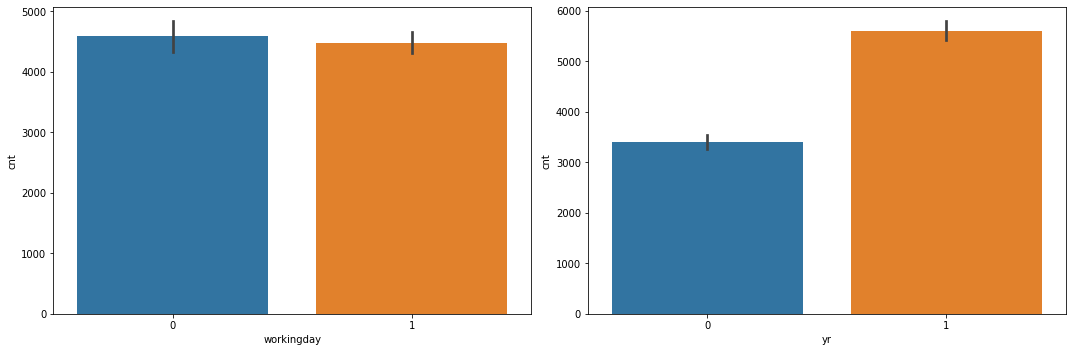

In [233]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)

sns.barplot(data=bike, x='workingday', y='cnt')

plt.subplot(1,2,2)
sns.barplot(data=bike, x='yr', y='cnt')

plt.tight_layout()
plt.show()

- It is inferred that the bikes are rented slightly more on a working day
- The year 2019 have significantly more rides than year 2018

## Numerical Variable Analysis against Count

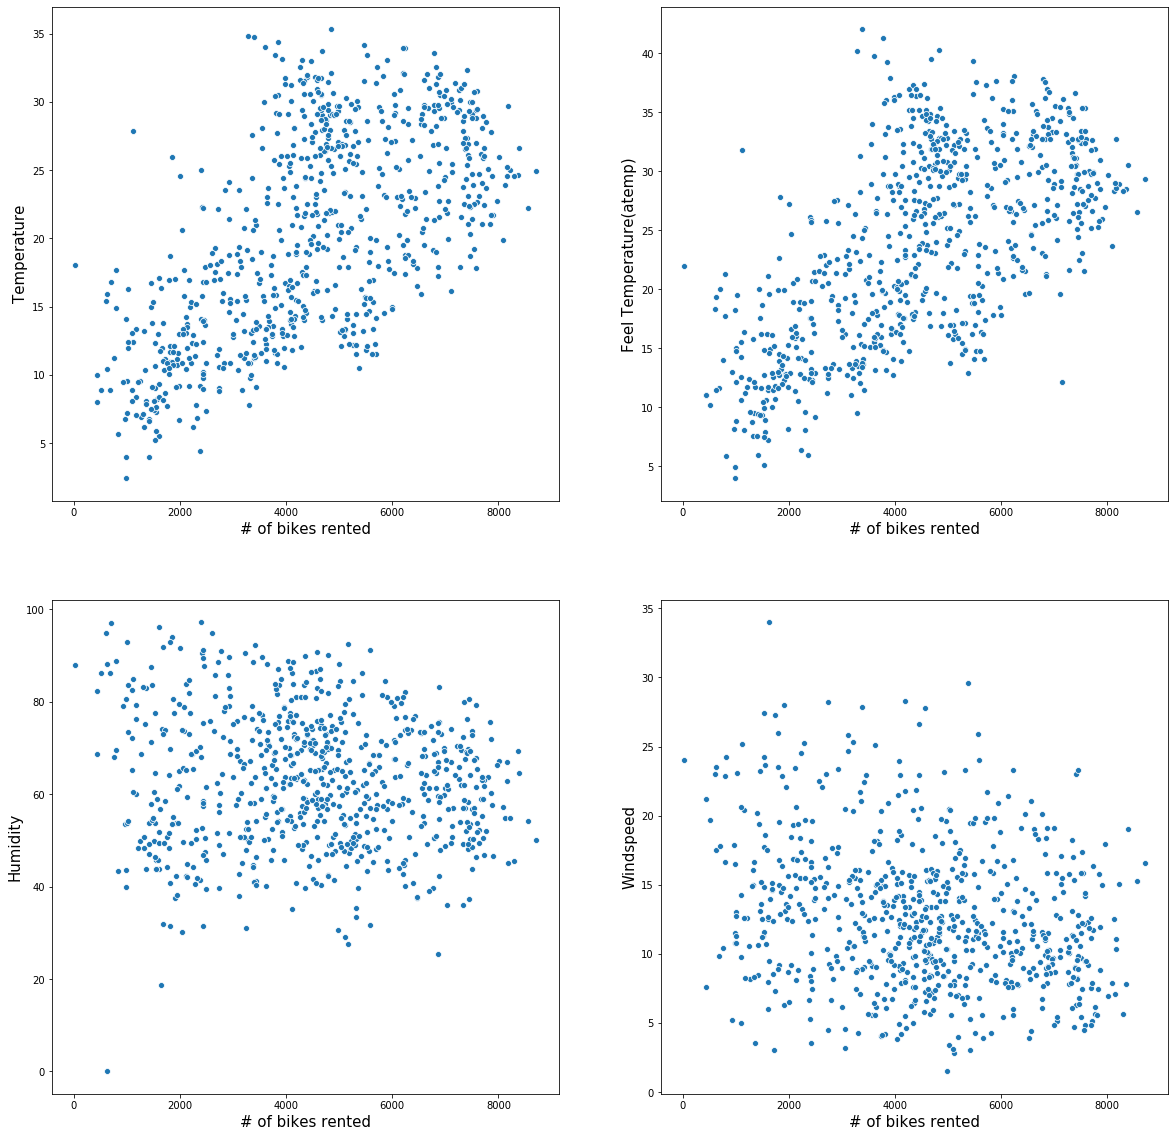

In [234]:
plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
sns.scatterplot(data=bike,x='cnt',y='temp')
plt.xlabel("# of bikes rented",fontsize=15)
plt.ylabel("Temperature",fontsize=15)

plt.subplot(2,2,2)
sns.scatterplot(data=bike,x='cnt',y='atemp')
plt.xlabel("# of bikes rented",fontsize=15)
plt.ylabel("Feel Temperature(atemp)",fontsize=15)


plt.subplot(2,2,3)
sns.scatterplot(data=bike,x='cnt',y='hum')
plt.xlabel("# of bikes rented",fontsize=15)
plt.ylabel("Humidity",fontsize=15)

plt.subplot(2,2,4)
sns.scatterplot(data=bike,x='cnt',y='windspeed')
plt.xlabel("# of bikes rented",fontsize=15)
plt.ylabel("Windspeed",fontsize=15)

plt.show()

* **Inferences**
- It is cleaer that the number of bikes rented increases as the temperature increases
- Most of the bikes are rented when the humidity is atleast 40
- Most bikes are rented when the windspeed iswithin 30
* Windspeed and humidity do not follow a linear pattern with cnt

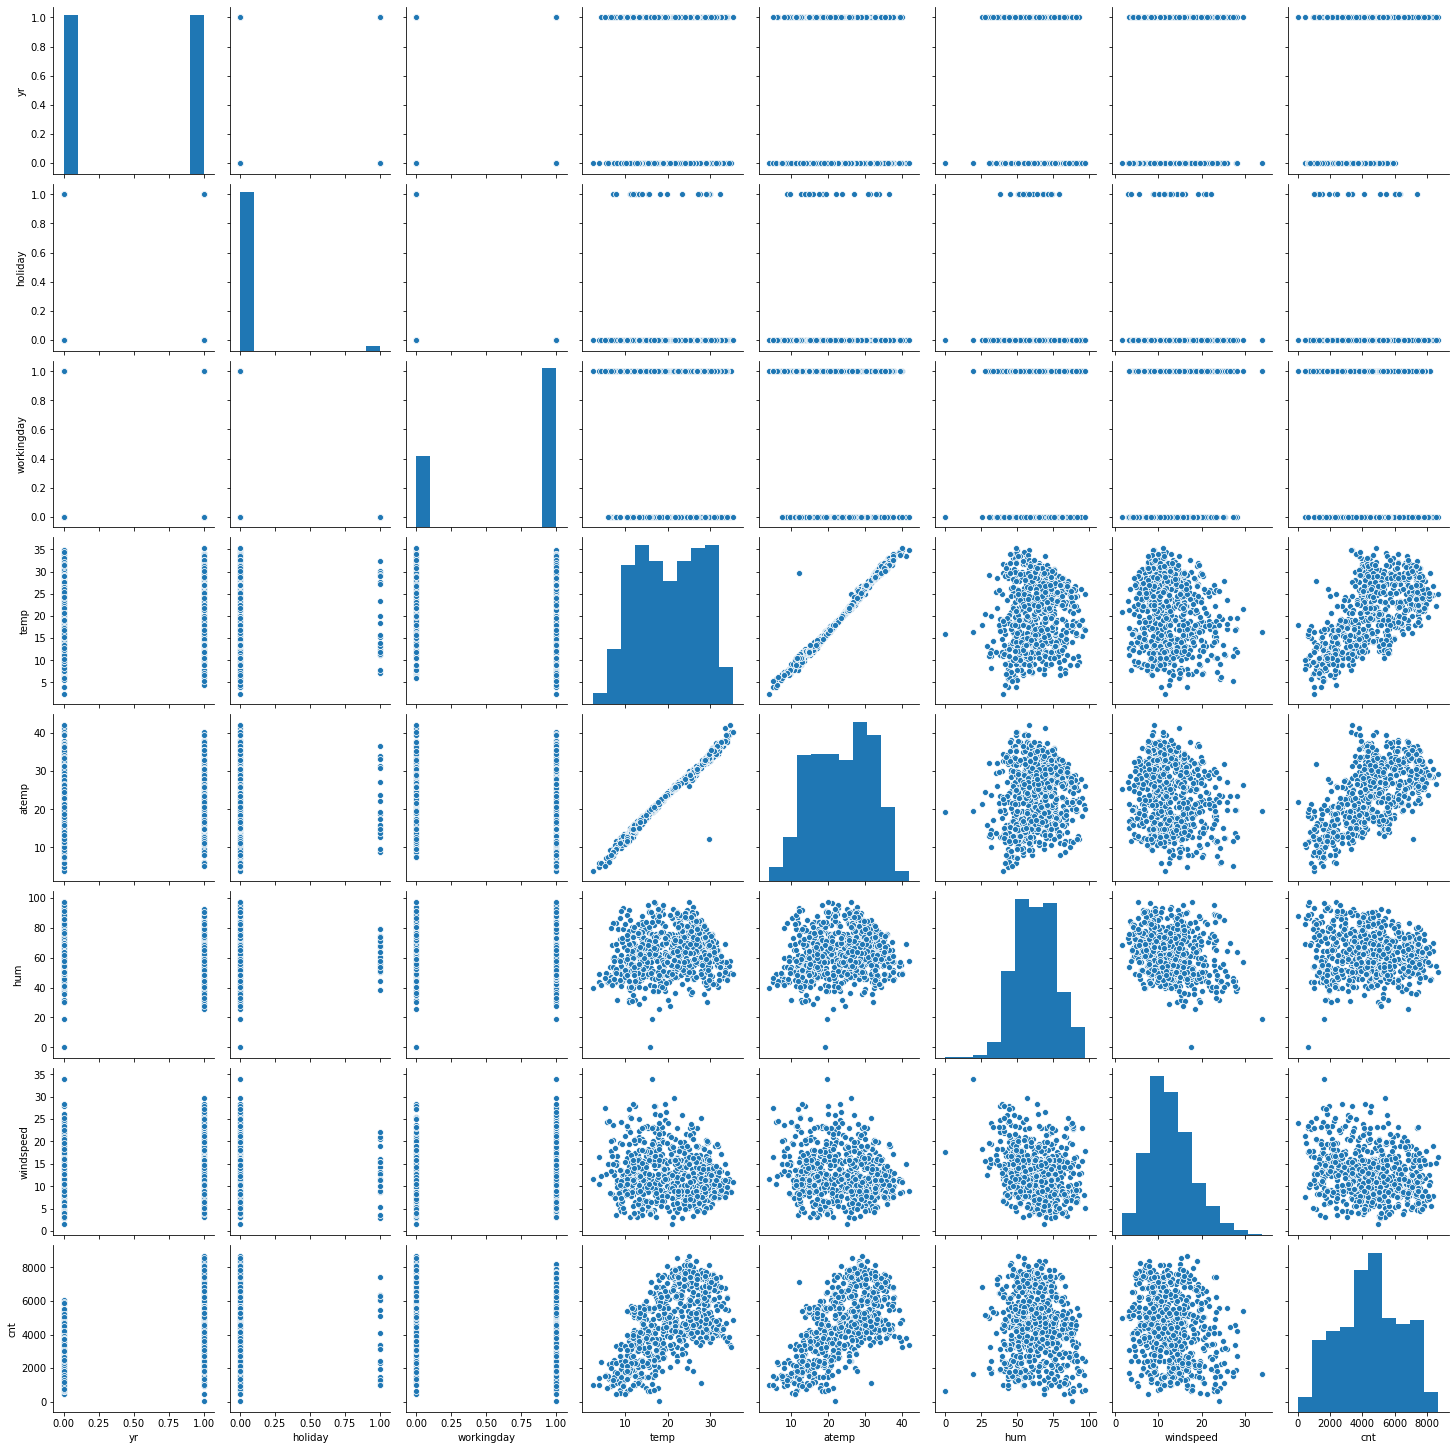

In [235]:
sns.pairplot(bike)
plt.show()

In [236]:
# defining function to return dummy variables for the categorical columns , dropping the first column 
def dummy(x,df):
    dum=pd.get_dummies(df[x],drop_first=True)
    df=pd.concat([df,dum],axis=1)
    return df



In [237]:
# creating dummy variables for these categorical columns
cat=['season','weekday','mnth','weathersit']
for i in cat:
    bike=dummy(i,bike)

In [238]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,January,July,June,March,May,November,October,September,Cloudy,"Light Rain, Snow"
0,spring,0,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,0,1,0
1,spring,0,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,0,0,1,0
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,1,0,0,0,0,0,0,0,0,0
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,0,0


In [239]:
# dropping the categorical variables after creating dummy variables
bike.drop(cat,axis=1,inplace=True)

In [240]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,January,July,June,March,May,November,October,September,Cloudy,"Light Rain, Snow"
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


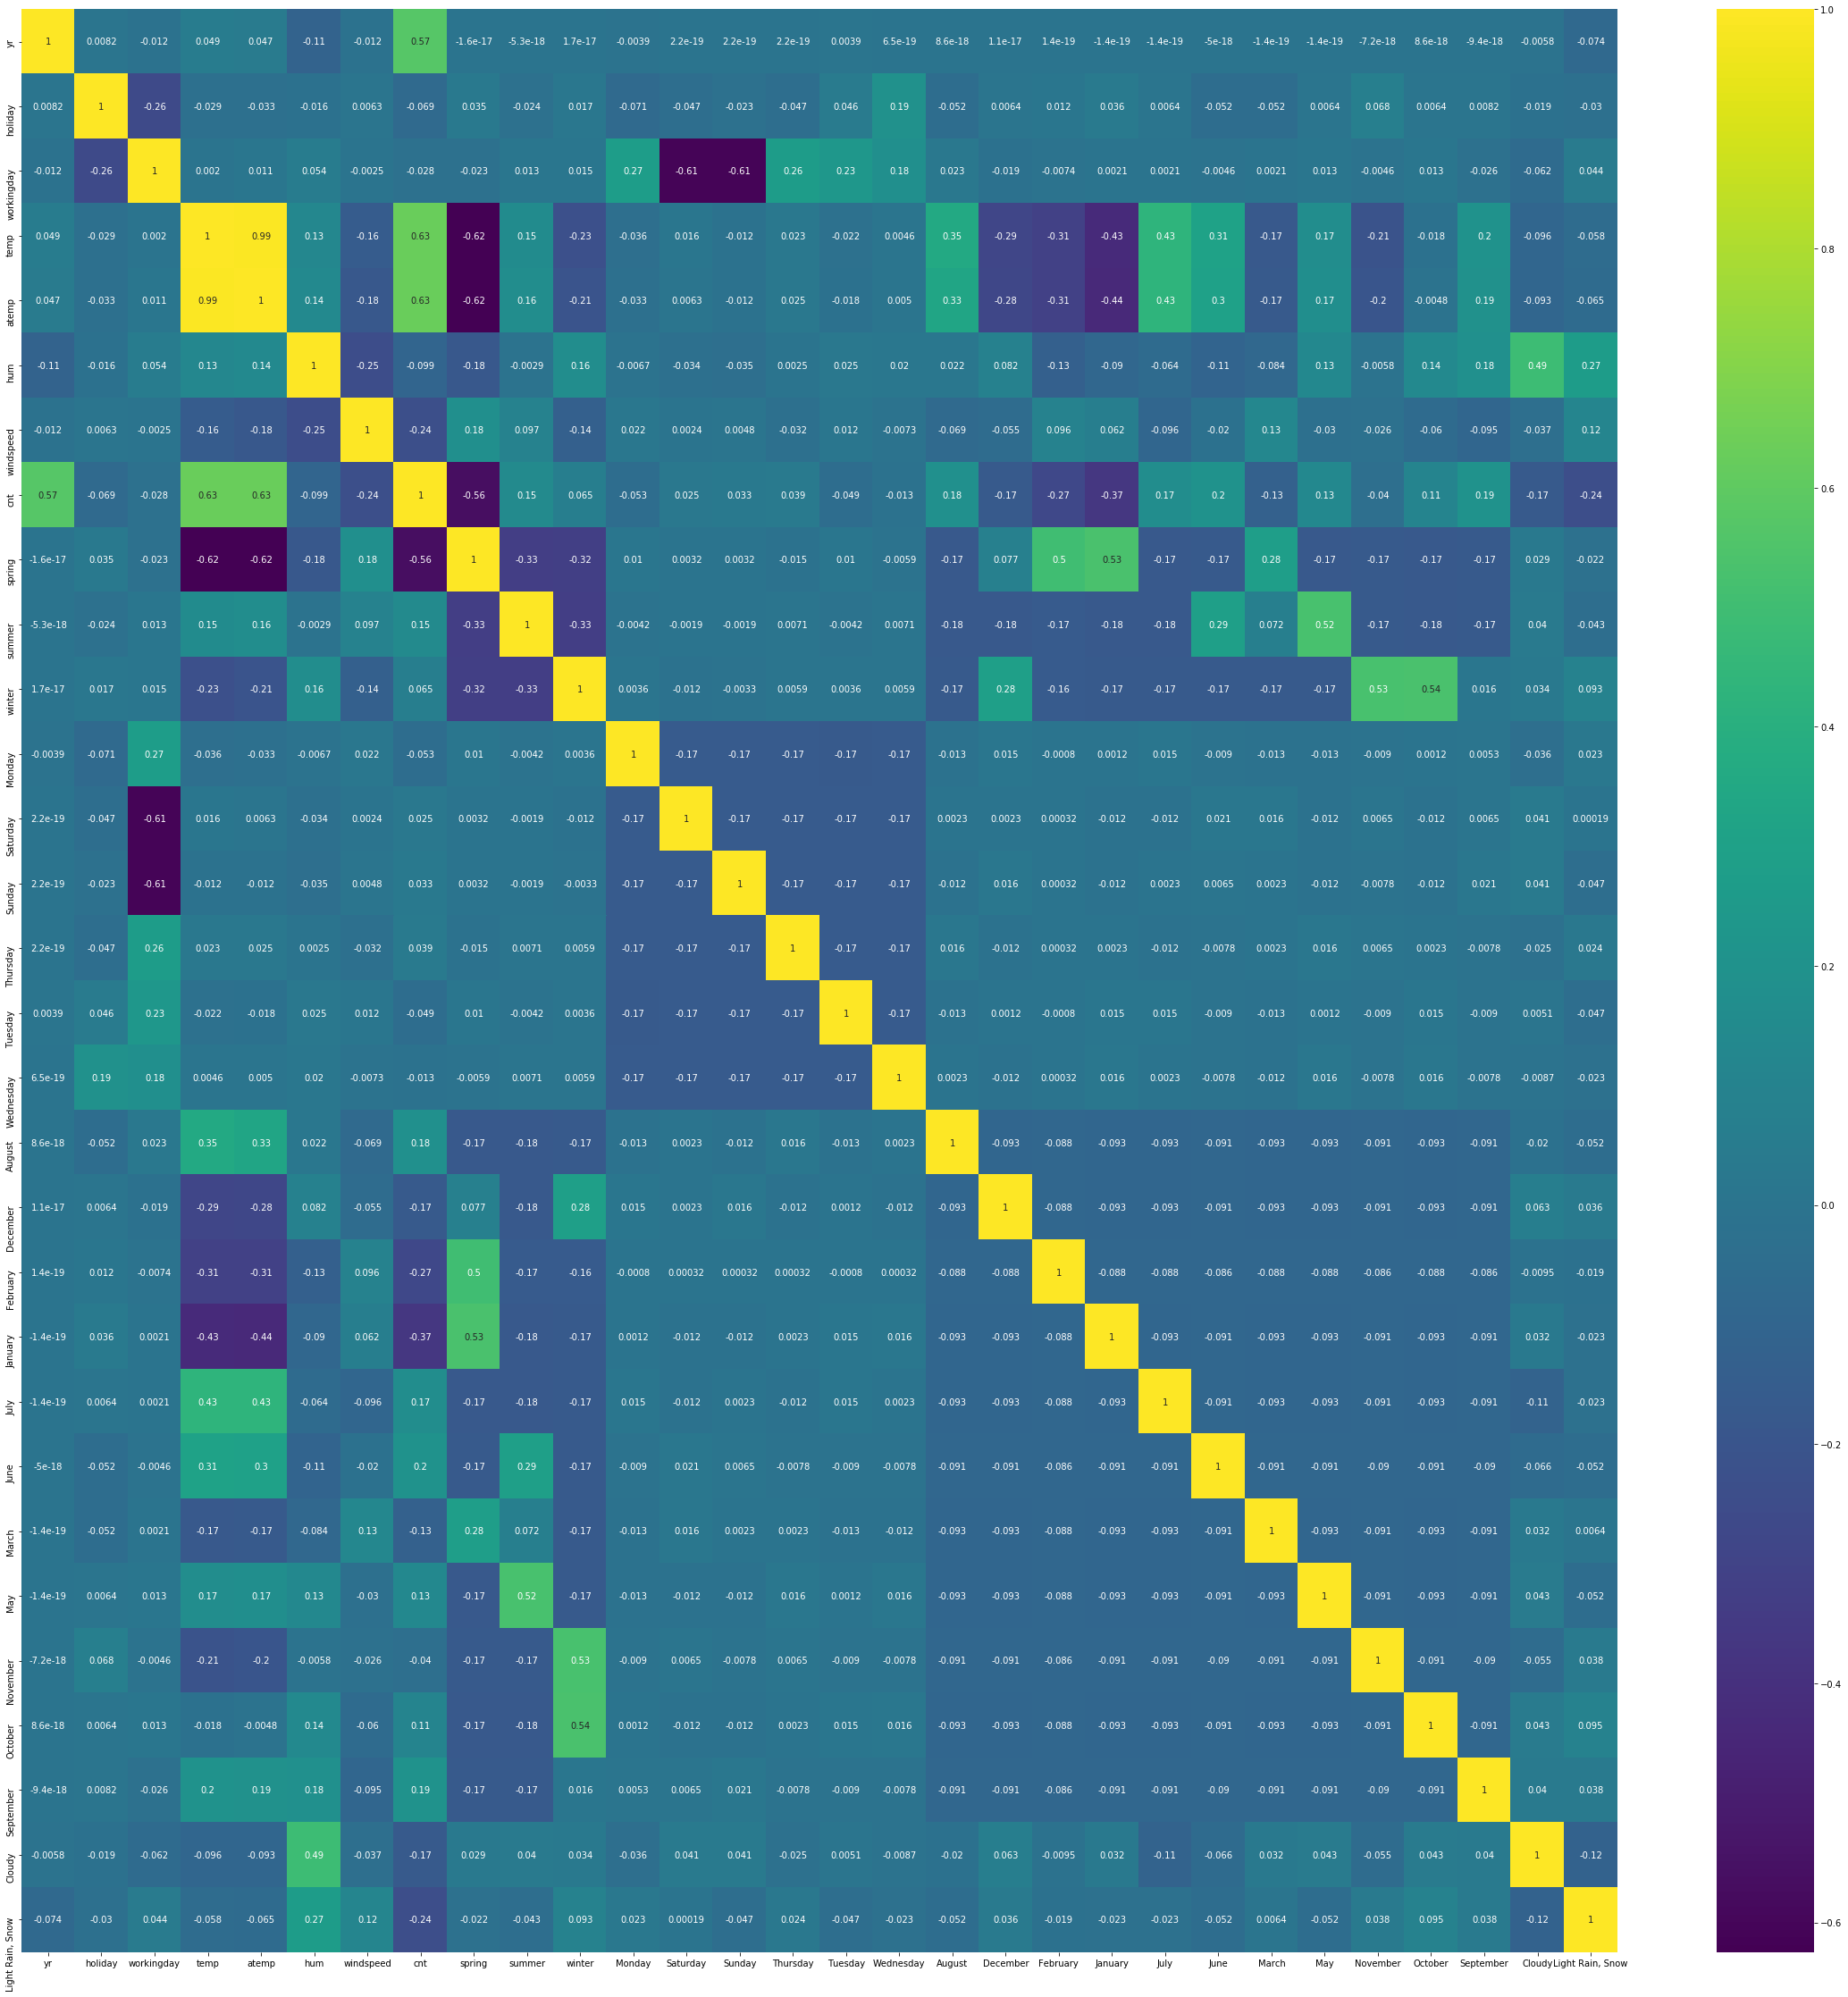

In [241]:
# correlation matrix after creating dummy variables and dropping categorical columns
plt.figure(figsize=(40,40))
sns.heatmap(bike.corr(),cmap='viridis',annot=True)
plt.show()

In [242]:
# importing libraries 
import statsmodels.api as sm
#importing variance inflation factor to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing minmax scaler to scale the train and test data
from sklearn.preprocessing import MinMaxScaler
# importing train test split to split the data into train and test
from sklearn.model_selection import train_test_split
# importing RFE inorder to perform Recursive Feature Elimination
from sklearn.feature_selection import RFE
# importing Linear Regression
from sklearn.linear_model import LinearRegression

In [243]:
# splitting the data to 70% train and 30% test data, randomstate at 100
np.random.seed(0)
df_train,df_test=train_test_split(bike,random_state=100,test_size=0.3)

In [244]:
# Using MinMax scaler for normalization
scaler=MinMaxScaler()

In [245]:
# scaling the numerical variables
num_var=['temp','atemp','hum','windspeed','cnt']
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [246]:
#Pop 'cnt' and assign to y_train
y_train=df_train.pop('cnt')


In [247]:
# Assigning the dataframe after removing 'cnt' to X_train
X_train=df_train

In [248]:
# Checking correlation of cnt with other variables
bike.corr()['cnt'].sort_values(ascending=False)

cnt                 1.000000
atemp               0.630685
temp                0.627044
yr                  0.569728
June                0.195568
September           0.194664
August              0.182100
July                0.166236
summer              0.145325
May                 0.132553
October             0.108846
winter              0.064619
Thursday            0.038672
Sunday              0.033227
Saturday            0.025004
Wednesday          -0.013282
workingday         -0.027640
November           -0.040344
Tuesday            -0.049471
Monday             -0.052581
holiday            -0.068764
hum                -0.098543
March              -0.128456
Cloudy             -0.170686
December           -0.173878
windspeed          -0.235132
Light Rain, Snow   -0.240602
February           -0.273848
January            -0.367167
spring             -0.561702
Name: cnt, dtype: float64

In [249]:
lm=LinearRegression()

In [250]:
# fitting train data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
#Using RFE to derive 15 variables to work on
rfe=RFE(lm,15)

In [252]:
#fitting this data after RFE
rfe=rfe.fit(X_train,y_train)

In [253]:
# List of all columns, with RFE support and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Cloudy', True, 1),
 ('Light Rain, Snow', True, 1)]

In [254]:
# Assigning RFE support columns to X_train_new
X_train_new=X_train[X_train.columns[rfe.support_]]
X_train_new.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,December,January,July,November,September,Cloudy,"Light Rain, Snow"
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [255]:
#function to build model
def modelbuilding(X,y):
    X=sm.add_constant(X)
    l=sm.OLS(y,X).fit()
    print(l.summary())
    return X
#defining function to check variance inflation factor
def vif(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['vif']=round(vif['vif'],2)
    vif.sort_values(by='vif',ascending=False, inplace=True)
    return vif

## Linear Regression Model 1

In [256]:
X_train_new=modelbuilding(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.29e-189
Time:                        21:19:29   Log-Likelihood:                 514.84
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3206      0.036  

* Adjusted R squared of 84% and all variables with p value less than 0.05

In [257]:
vif(X_train_new.drop('const',axis=1))

,Features,vif
3,hum,30.93
2,temp,17.82
4,windspeed,4.73
5,spring,4.37
7,winter,4.06
6,summer,2.82
13,Cloudy,2.32
0,yr,2.09
11,November,1.83
9,January,1.75


* VIF of hum =30.93 hence dropping hum 

In [258]:
X_train_new.drop("hum",axis=1,inplace=True)

## Linear Regression Model 2

In [259]:
X_train_new=modelbuilding(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          1.41e-186
Time:                        21:19:31   Log-Likelihood:                 505.44
No. Observations:                 511   AIC:                            -980.9
Df Residuals:                     496   BIC:                            -917.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2457      0.032  

In [260]:
vif(X_train_new.drop('const',axis=1))

,Features,vif
2,temp,5.18
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.24
0,yr,2.08
10,November,1.80
8,January,1.66
9,July,1.59
12,Cloudy,1.56


- Dropping windspeed as vif=4.67, however, it is less than vif of temperature, the coefficient of windspeed is also 30% of temperature, inorder to prevent much difference in the adjusted R squared

# Linear Regression Model 3

In [261]:
X_train_new.drop("windspeed",axis=1,inplace=True)
X_train_new=modelbuilding(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.3
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          1.54e-179
Time:                        21:19:32   Log-Likelihood:                 485.95
No. Observations:                 511   AIC:                            -943.9
Df Residuals:                     497   BIC:                            -884.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1844      0.032  

* Adjusted R squared has dropped to 82.2%

In [262]:
vif(X_train_new.drop('const',axis=1))

,Features,vif
2,temp,4.31
5,winter,2.79
3,spring,2.12
0,yr,2.07
4,summer,1.94
9,November,1.78
7,January,1.65
8,July,1.59
11,Cloudy,1.56
6,December,1.46


- Dropping summer due to p value>0.05

# Linear Regression Model 4

In [263]:
X_train_new.drop("summer",axis=1,inplace=True)
X_train_new=modelbuilding(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          4.09e-180
Time:                        21:19:33   Log-Likelihood:                 484.57
No. Observations:                 511   AIC:                            -943.1
Df Residuals:                     498   BIC:                            -888.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2199      0.023  

- Adjusted R squared is 82.1%. P values of all variables <0.05

In [264]:
vif(X_train_new.drop('const',axis=1))

,Features,vif
2,temp,3.04
4,winter,2.51
0,yr,2.06
3,spring,1.93
8,November,1.78
6,January,1.65
10,Cloudy,1.52
5,December,1.46
7,July,1.34
9,September,1.20


- Since January, December already come under winter, and due to low coefficient of January, dropping January 

# Linear Regression Model 5

In [265]:
X_train_new.drop("January",axis=1,inplace=True)
X_train_new=modelbuilding(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.7
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.19e-180
Time:                        21:19:35   Log-Likelihood:                 482.43
No. Observations:                 511   AIC:                            -940.9
Df Residuals:                     499   BIC:                            -890.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2083      0.023  

- Adjusted R squared becomes 82.0 and the p value of December > 0.05. Hence, dropping December

In [266]:
vif(X_train_new.drop('const',axis=1))

,Features,vif
2,temp,3.00
4,winter,2.49
0,yr,2.05
7,November,1.77
9,Cloudy,1.51
5,December,1.42
6,July,1.33
3,spring,1.29
8,September,1.20
10,"Light Rain, Snow",1.07


# Linear Regression Model 6

In [267]:
X_train_new.drop("December",axis=1,inplace=True)
X_train_new=modelbuilding(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.5
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          7.26e-181
Time:                        21:19:35   Log-Likelihood:                 480.74
No. Observations:                 511   AIC:                            -939.5
Df Residuals:                     500   BIC:                            -892.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1998      0.022  

- On dropping December, adjusted R squared is 82% and p value of November>0.05, hence dropping November.

# Linear Regression Model 7

In [268]:
X_train_new.drop("November",axis=1,inplace=True)
X_train_new=modelbuilding(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.04e-181
Time:                        21:19:36   Log-Likelihood:                 479.16
No. Observations:                 511   AIC:                            -938.3
Df Residuals:                     501   BIC:                            -896.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1947      0.022  

In [269]:
vif(X_train_new.drop('const',axis=1))

,Features,vif
2,temp,2.99
0,yr,2.05
7,Cloudy,1.51
4,winter,1.33
5,July,1.33
3,spring,1.25
6,September,1.19
8,"Light Rain, Snow",1.06
1,holiday,1.04


* At adjusted R squared of 81.9%, p values of all variables being significant and VIF being < 5, we have prepared a list of 9 independent variables

# Residual Analysis of Train Data

In [270]:
lm=sm.OLS(y_train,X_train_new).fit()


In [271]:
y_train_pred=lm.predict(X_train_new)

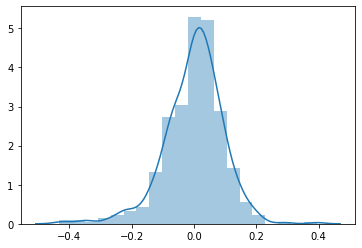

In [272]:
# Checking error distribution 
sns.distplot(y_train-y_train_pred,bins=20)
plt.show()

-  The error terms, ε(i), are normally distributed around zero.


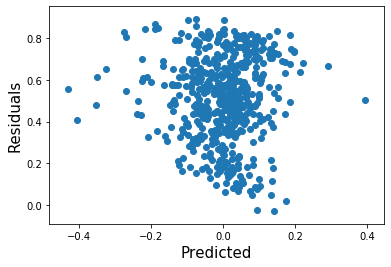

In [273]:
plt.scatter((y_train-y_train_pred),y_train_pred)
plt.xlabel('Predicted', fontsize= 15)
plt.ylabel('Residuals', fontsize=15)
plt.show()

- We can see that the residuals does not form any pattern hence they are independent of each other 

# Prediction and Evaluation

In [274]:
# transforming the test data
df_test[num_var]=scaler.transform(df_test[num_var])

In [275]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,January,July,June,March,May,November,October,September,Cloudy,"Light Rain, Snow"
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,1,0,0,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.243430,0.708888,0.287411,0.336516,1,0,...,0,0,0,0,0,0,0,0,1,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,0,0,0,0,0,0,1,0,1,0


In [276]:
#Dividing into X and y
y_test=df_test.pop('cnt')
X_test=df_test

In [277]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new=X_test[(X_train_new.drop('const',axis=1)).columns]

In [278]:
X_test_new.shape

(219, 9)

In [279]:
# Adding a constant variable
X_test_new=sm.add_constant(X_test_new)

In [280]:
# Making Predictions
y_pred=lm.predict(X_test_new)

In [281]:
# Evaluation of test via comparison of y_pred and y_test
# R-squared score on the test set
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)

In [282]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred) 

In [283]:
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared) 

Mean_Squared_Error : 0.00904557019156598
r_square_value : 0.8095501362363489


- The model is getting a mean square error of 0.9% which means the model is not able to match 0.9% of the values only.
- The r square value is about 80.9% which means this model is able to explain 81% of the variance

In [284]:
lm.params.sort_values(ascending=False)

temp                0.470173
yr                  0.233713
const               0.194663
September           0.065122
winter              0.054748
July               -0.069257
Cloudy             -0.078591
holiday            -0.101066
spring             -0.111913
Light Rain, Snow   -0.299970
dtype: float64

### Final Model:
y=0.1974+(.2337 * X['yr']) -(0.1011 * X['holiday']) + (0.4702 * X['temp'])-(0.1119* X["spring"])+(0.0547* X["winter"])-(0.0693* X["July"])+(.0651* X["September"])-(0.0786* X["Cloudy"])-(0.3* X["Light Rain, Snow"])


In [285]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.04e-181
Time:                        21:19:44   Log-Likelihood:                 479.16
No. Observations:                 511   AIC:                            -938.3
Df Residuals:                     501   BIC:                            -896.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1947      0.022      8.769      0.000       0.151       0.238
yr                   0.2337      0.009     27.344      0.000       0.217       0.251
holiday             -0.1011      0.027     -3.730      0.000      -0.154      -0.048
temp                 0.4702      0.031     15.000      0.000       0.409       0.532
spring              -0.1119      0.016     -7.119      0.000      -0.143      -0.081
winter               0.0547      0.013      4.306      0.000       0.030       0.080
July                -0.0693      0.018     -3.843      0.000      -0.105      -0.034
September            0.0651      0.016      3.993      0.000       0.033       0.097
Cloudy              -0.0786      0.009     -8.640      0.000      -0.096      -0.061
Light Rain, Snow    -0.3000      0.026    -11.731      0.000      -0.350      -0.250
==============================================================================
Omnibus:                       66.747   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.305
Skew:                          -0.661   Prob(JB):                     6.33e-38
Kurtosis:                       5.509   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

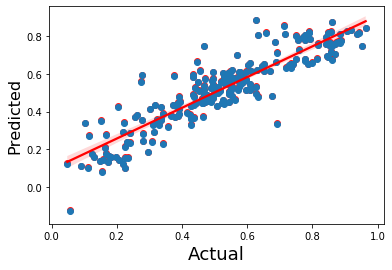

In [286]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
res = y=0.1974+(.2337 * X_test_new['yr']) -(0.1011 * X_test_new['holiday']) + (0.4702 * X_test_new['temp'])-(0.1119*X_test_new["spring"])+(0.0547*X_test_new["winter"])-(0.0693*X_test_new["July"])+(.0651*X_test_new["September"])-(0.0786*X_test_new["Cloudy"])-(0.3*X_test_new["Light Rain, Snow"])
sns.regplot(x=y_test,y=res, color='r')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)     
plt.show()

- We can observe that the predicted value and actual value has strong correlation, justifying assumption about the form of the model: It is assumed that there is a linear relationship between the dependent and independent variables. It is known as the 'linearity assumption'.

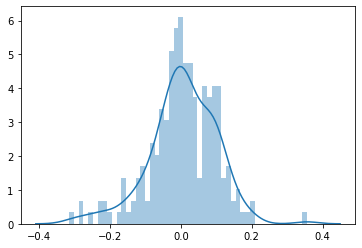

In [287]:
sns.distplot(y_test-y_pred,bins=50)
plt.show()

Error terms distribution of test data

In [288]:
# Evaluation of the model using Statistics
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.04e-181
Time:                        21:19:51   Log-Likelihood:                 479.16
No. Observations:                 511   AIC:                            -938.3
Df Residuals:                     501   BIC:                            -896.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1947      0.022  

### Final model includes the following variables:
*    yr
*    holiday
*   temp
*   spring
*   winter
*   July
*   September
*   Clougy
*   Light Rain, Snow

* Seasons and months have been selected in a way so that they do not overlap:
    * Eg: Winter is selected, wheras November, December and January have been removed.
    * Similarly, July has been used wheras Summer has been removed.
    * September has been used while fall has been removed(due to dropping first column while creating dummy variables)